In [10]:
# Pre-importing the needed modules.
import numpy as np, matplotlib.pyplot as plt, pandas as pd, wikipedia
from pandas import read_csv

(1279, 1)
(1279,)


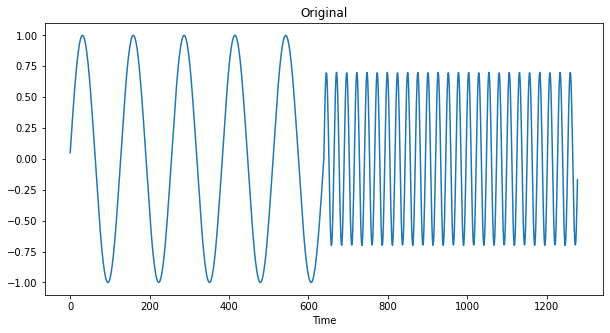

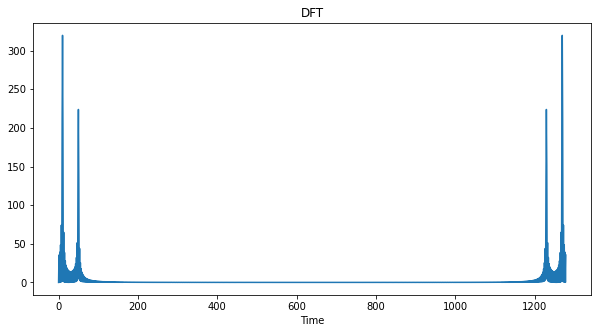

In [11]:
# Loading file and flattening the array.
file = read_csv("timeseries.csv")
print(file.shape)
arr = np.array(file).flatten()
print(arr.shape)
# Flattening can be checked through the shape.

plt.figure(figsize=(10,5))
plt.title("Original")
plt.xlabel('Time')
plt.plot(arr)

# Fast fourier.
arrx = np.fft.fft(arr)

plt.figure(figsize=(10,5))
plt.title("DFT")
plt.xlabel('Time')
plt.plot(np.abs(arrx))

# Four spikes can be seen in the DFT time-series. These can be considered the predominant frequency components. All in all 4 predominant freq components.

               Births
Date                 
1959-01-01   0.000000
1959-01-02   0.000000
1959-01-03   0.000000
1959-01-04   0.000000
1959-01-05   0.000000
1959-01-06   0.000000
1959-01-07  35.142857
1959-01-08  36.285714
1959-01-09  37.142857
1959-01-10  36.714286
1959-01-11  37.714286
1959-01-12  36.142857
1959-01-13  39.857143
1959-01-14  40.142857
1959-01-15  40.428571


<AxesSubplot:title={'center':'Smoothened Births'}, xlabel='Date'>

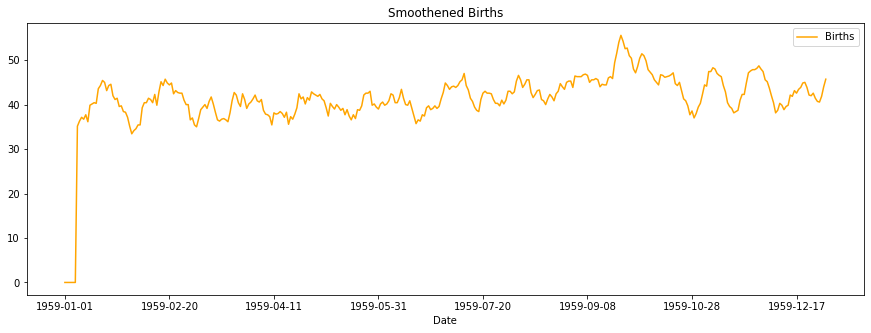

In [12]:
births = read_csv("births.csv", header=0, index_col=0)

smoothened_births = births.rolling(window=7) # 7 DAYS (ONE WEEK)
smoothened_births_mean = smoothened_births.mean()

smoothened_births_mean.fillna(0, inplace=True) # Replacing nan with zeros.
print(smoothened_births_mean.head(15))

smoothened_births_mean.plot(color='orange', figsize=(15,5), title='Smoothened Births')

1960-01-01    45.380177
1960-01-02    44.960852
1960-01-03    44.590676
1960-01-04    44.271699
1960-01-05    43.997395
1960-01-06    43.761548
Freq: D, dtype: float64


/home/kalamari/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/kalamari/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


<AxesSubplot:title={'center':'AR Births'}>

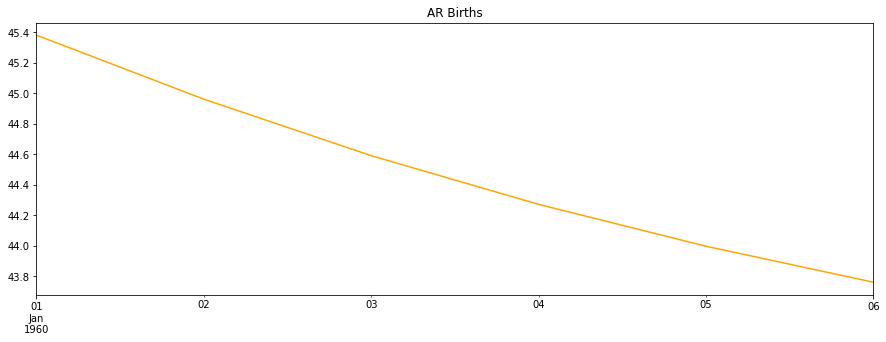

In [13]:
from statsmodels.tsa.ar_model import AutoReg

# Predicting for the next 5 days with p = 2
model_ar = AutoReg(smoothened_births_mean, lags=2)
model_ar_fit = model_ar.fit()
yhat_ar = model_ar_fit.predict(len(smoothened_births_mean), len(smoothened_births_mean)+5)
print(yhat_ar)

yhat_ar.plot(color='orange', figsize=(15,5), title='AR Births')

/home/kalamari/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/kalamari/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/kalamari/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


1960-01-01    45.810249
1960-01-02    45.818768
1960-01-03    45.728095
1960-01-04    45.564020
1960-01-05    45.347310
1960-01-06    45.094573
Freq: D, Name: predicted_mean, dtype: float64


<AxesSubplot:title={'center':'ARMA Births'}>

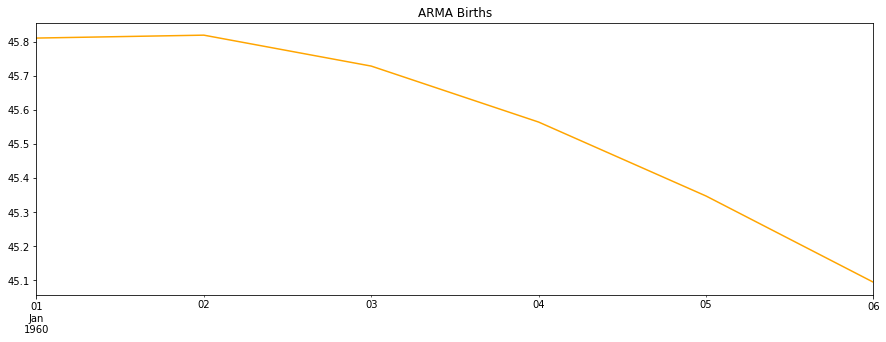

In [14]:
from statsmodels.tsa.arima.model import ARIMA

#p = 2, q = 2. Predicting for the next 5 days.
model_arma = ARIMA(smoothened_births_mean, order=(2,0,2))
model_arma_fit = model_arma.fit()
yhat_arma = model_arma_fit.predict(len(smoothened_births_mean), len(smoothened_births_mean)+5)

print(yhat_arma)

yhat_arma.plot(color='orange', figsize=(15,5), title='ARMA Births')

In [15]:
articles=['supervised learning', 'unsupervised learning', 'semi-supervised learning', 'association rule learning', 'anomaly detection', 'cluster analysis', 'dimensionality reduction', 'regression analysis', 'statistical classification',  'data warehouse', 'online analytical processing']


wiki_lst=[]
title=[]

# Load wikipedia articles
for article in articles:
   print("loading content: ",article)
   wiki_lst.append(wikipedia.page(article).content)
   title.append(article)


loading content:  supervised learning
loading content:  unsupervised learning
loading content:  semi-supervised learning
loading content:  association rule learning
loading content:  anomaly detection
loading content:  cluster analysis
loading content:  dimensionality reduction
loading content:  regression analysis
loading content:  statistical classification
loading content:  data warehouse
loading content:  online analytical processing


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst) # Create tf-idf feature of the wikipedia dataset

print(X.shape) # Print dimensions of tf-idf feature

(11, 4054)


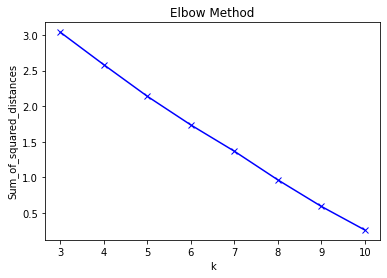

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Picking a range of roughly the amount of groups / 2 by total
Sum_of_squared_distances = []
K = range(3,11)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

#Looks like number 5

In [18]:
# Fit k-means model with k=8
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

# Print list of documents and associated clusters
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                           title  cluster
8     statistical classification        0
3      association rule learning        1
5               cluster analysis        1
0            supervised learning        2
2       semi-supervised learning        2
7            regression analysis        2
4              anomaly detection        3
10  online analytical processing        4
6       dimensionality reduction        5
9                 data warehouse        6
1          unsupervised learning        7


Cluster 0:
This is a broadly traditional statistical methodology whereas the learning approaches differ in the fact they can dynamically introduce parameters for classification amongst other things.
 
Cluster 1:
Association rule learning and cluster analysis share cluster 1.This makes sense as relations between variables can be clustered if they share commonalities across the dataset. 

Cluster 2: 
Supervised and semi-supervised differ based on labelled data and unlabelled data. It is okay to assume this generally but the only broad similarity is the dependance on manually labelled data for the two techniques is something which they managed to do well without.

Cluster 3:
Anomaly detection is in its own cluster which makes sense as it is more specific than the general approaches here. It is within the scope of outlier detection and makes sense to have a unique cluster.

Cluster 4:
Online analytical processing is in cluster 4 by itself and that makes sense as OLAP can be defined as a broader umbrella term that holds multiple data mining and aggregation methodologies under it whereas the other approaches here are more specific.

Cluster 5:
Dimensionality reduction such as PCA that we have already worked with tries to map data to a lower dimensional space so that the representation in variance is maximized; this being a feature projection method. Generally dimensionality reduction generally is used both through feature selection and feature reduction. It is used generally in other approaches seen here as part of the workflow but it certainly deserves its own cluster.

Cluster 6: 
Data warehouse is not a method but an architecture, structural term for a facility / system that aggregates data from different sources into a single data store. It is not a learning / theoretical approach so being in its own cluster makes sense here at least.

Cluster 7:
Unsupervised learning is usually the approach of analyzing and clustering unlabeled datasets. It is in its own cluster here as it is devoid cluster. 

